In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 6.0]

import okama as ok

AssetList has a set of methods usefull to track the perfomance of index funds compare them with benchmarks:
- tracking difference
- tracking error
- beta
- rolling and cumulative correlation

### Tracking difference

Tracking diffrenece is calculated by measuring the difference between the accumulated return of an index and those of the ETFs (or other index funds) replicating it.

Let's compare main S&P500 ETFs.

In [2]:
symbols = ['SP500TR.INDX', 'SPY.US', 'VOO.US', 'IVV.US']  # the benchmark symbol should be in the place
sp = ok.AssetList(symbols)
sp

symbols          [SP500TR.INDX, SPY.US, VOO.US, IVV.US]
currency                                            USD
first date                                      2010-10
last_date                                       2021-02
period length                        10 years, 5 months
inflation                                      USD.INFL
dtype: object

In [3]:
sp.names

{'SP500TR.INDX': 'S&P 500 (TR)',
 'SPY.US': 'SPDR S&P 500 ETF Trust',
 'VOO.US': 'Vanguard S&P 500 ETF',
 'IVV.US': 'iShares Core S&P 500 ETF'}

We can check the general tracking difference as a difference in their accumulated return.

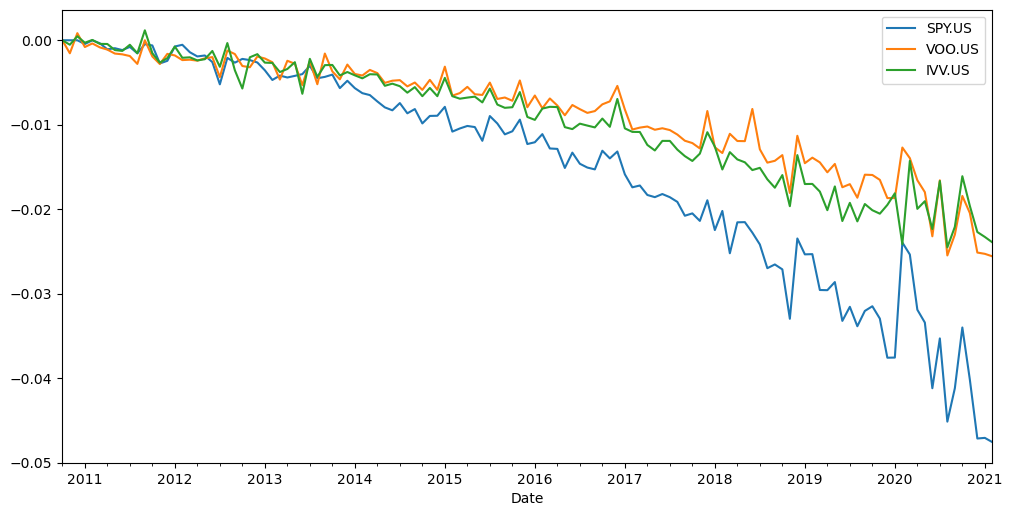

In [4]:
sp.tracking_difference.plot();

... or see the same numbers but annualized.

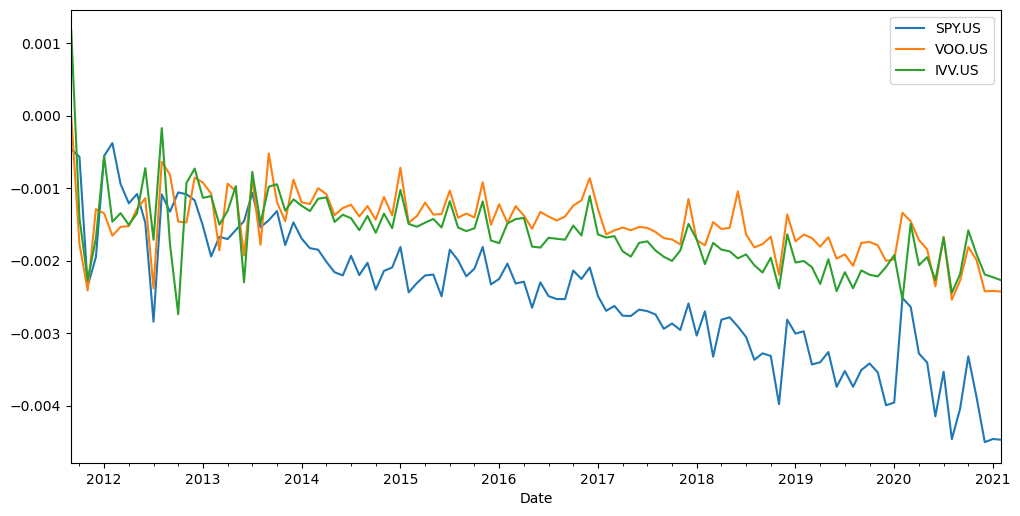

In [5]:
sp.tracking_difference_annualized.plot();

### Tracking Error

Tracking Error is the standard deviation of the difference between the ETF and index returns.

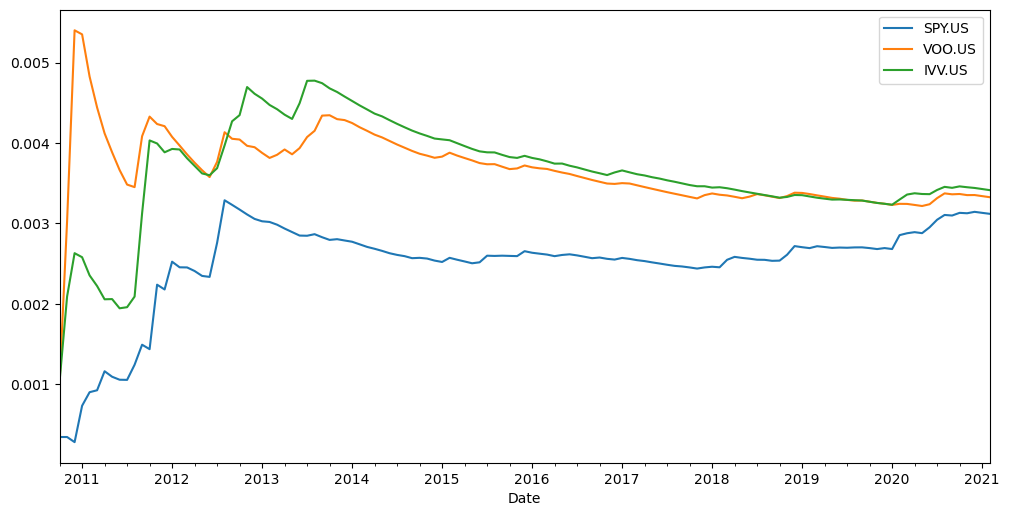

In [6]:
sp.tracking_error.plot();

### Beta

Another popular parameter for index funds is their beta. 

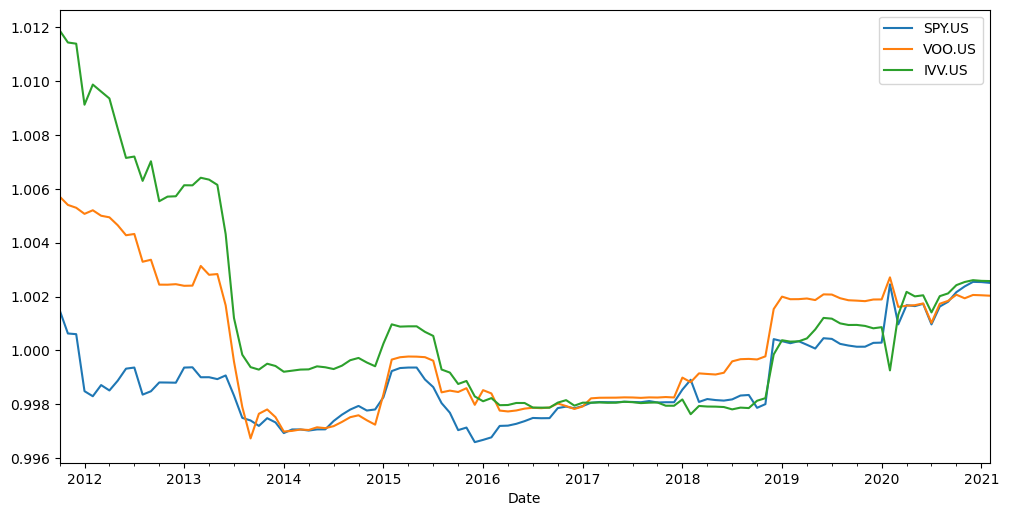

In [7]:
sp.index_beta.plot();

... we see here that all 3 funds have similar (high) beta.

### Correlation with index

Sometimes it's useful to check the correlation between different asset types.

In [8]:
assets = ['SP500TR.INDX', 'VBMFX.US', 'GC.COMM', 'VNQ.US']  # GC.COMM - gold spot prices
x = ok.AssetList(assets)
x

symbols          [SP500TR.INDX, VBMFX.US, GC.COMM, VNQ.US]
currency                                               USD
first date                                         2004-10
last_date                                          2021-02
period length                           16 years, 5 months
inflation                                         USD.INFL
dtype: object

In [9]:
x.names

{'SP500TR.INDX': 'S&P 500 (TR)',
 'VBMFX.US': 'VANGUARD TOTAL BOND MARKET INDEX FUND INVESTOR SHARES',
 'GC.COMM': 'Gold',
 'VNQ.US': 'Vanguard Real Estate Index Fund ETF Shares'}

It is possible to see as the correlation was changing during the period.

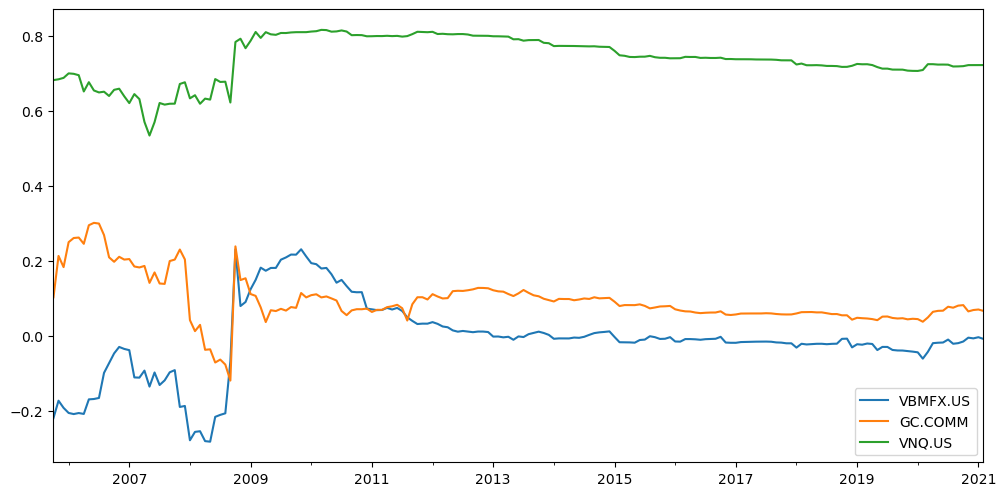

In [10]:
x.index_corr.plot();

Sometimes it's better to verify the rolling correlation with the benchmark (S&P 500 Total Return index).   
Rolling period size could be set with window attribute in moths.

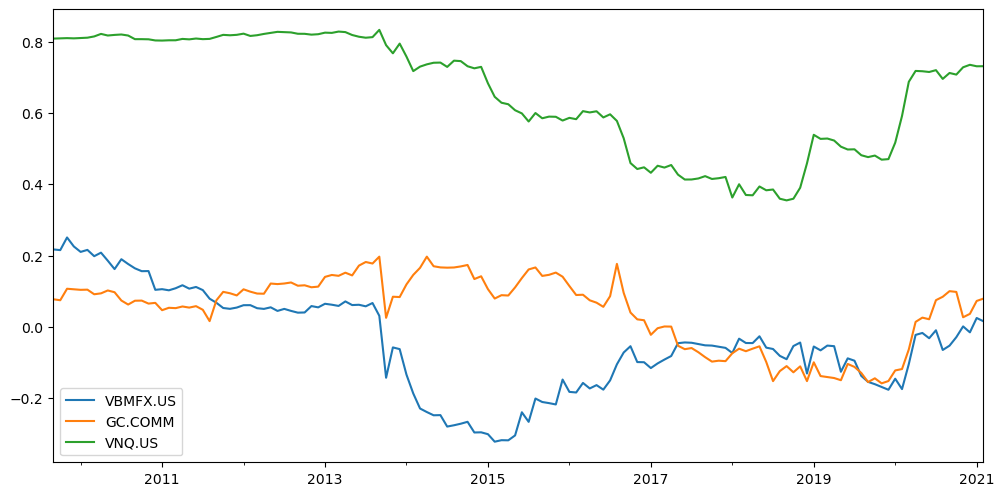

In [11]:
x.index_rolling_corr(window=60).plot();

It can be clearly seen that real estat ETF (VNQ) has higher correlation with stocks comparing with gold prices and bonds during this period.